### 1. Counting and Timing Operations Carried out in an Algorithm

#### a. Sum of a List with Operation Counting and Timing


Implement a Python function that accepts a list of numbers and returns the **sum of its elements** — without using the built-in `sum()` function.

In addition to computing the sum, your function should **instrument** the algorithm by tracking:
- The **number of additions** performed (one per element).
- The **number of assignments** (initializing the accumulator, updating it each iteration).
- The **wall-clock time** taken to execute (use `time.time()` before and after the main loop).

The function should return a tuple: `(total_sum, operation_count, time_taken)`.

**Test** your function on a list of 10,000 random integers between 1 and 100. How does the operation count relate to the length of the input list?

Progress: [#################################################>] 100%


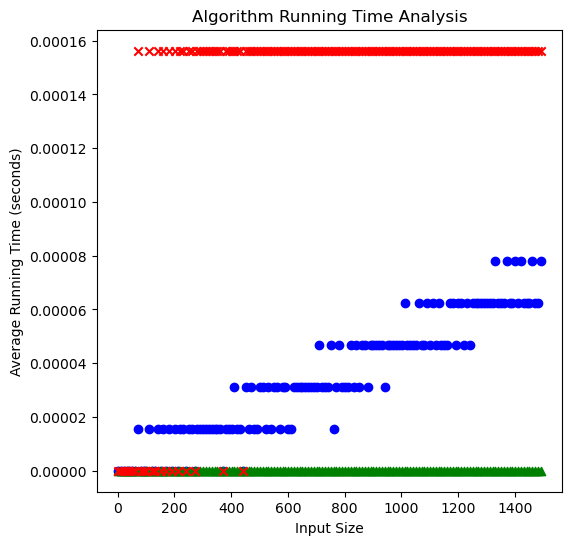

List sum, # of assignments, # of additions:  (506025, {'additions': 10000, 'assignments': 10002}, 0.0005037784576416016)


In [32]:
import random
import time
from helper import test_sort_algo


def sum_list(input_list: list[int]) -> tuple[int, int, float]:
    assignments = 2
    additions = 0
    
    start_time = time.time()
    total_sum = 0
    
    for num in input_list:
        total_sum += num
        additions += 1
        assignments += 1
    
    end_time = time.time()
    time_taken = end_time - start_time
    
    operation_counts = {
        "additions": additions,
        "assignments": assignments
    }
    
    return total_sum, operation_counts, time_taken
    
test_list = [random.randint(1,100) for x in range(10000)]

test_sort_algo(sum_list)
             
print('List sum, # of assignments, # of additions: ',sum_list(test_list))

#### b. Finding the Maximum with Comparison Counting


Implement a Python function `find_max_with_counter(lst)` that finds the **maximum value** in a list — without using the built-in `max()` function.

Your function should also count the **number of comparisons** made during execution. Return both the maximum value and the comparison count as a tuple: `(max_value, num_comparisons)`.

**Think about:** For a list of length $n$, what is the minimum number of comparisons needed? Does the number of comparisons depend on the arrangement of elements (e.g., sorted vs. random)?

Example:
```python
find_max_with_counter([3, 2, 5, 8, 10, 2, 1, 5])  # → (10, ...)
```

Progress: [#################################################>] 100%


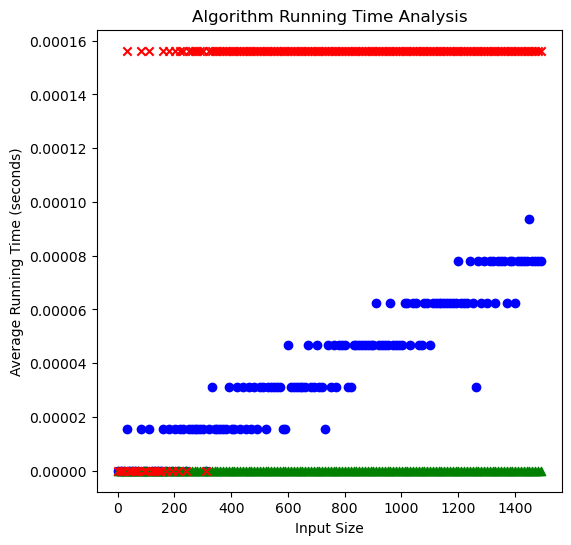

(10, 8)

In [33]:
def find_maximum(lst: list[int]) -> tuple[int, int]:
    if len(lst) == 0: return -1

    largest_index = 0
    num_comparisons = 0
    for i, num in enumerate(lst):
        if num > lst[largest_index]:
            largest_index = i
        num_comparisons += 1

    return (lst[largest_index], num_comparisons)


test_sort_algo(find_maximum)

find_maximum([3,2,5,8,10,2,1,5])

### 2. Evaluating Algorithms

#### a. Bubble Sort vs. Built-in Sort


Implement your own **bubble sort** function, then compare its performance against Python's built-in `sorted()` function.

**Bubble sort** works by repeatedly stepping through the list, comparing adjacent elements, and swapping them if they are in the wrong order. The pass through the list is repeated until no swaps are needed. It has $O(n^2)$ average and worst-case time complexity.

Use the `time` module to measure how long each method takes on a randomly generated list of 1,000 integers. How large is the speed difference? Why is the built-in sort so much faster? *(Hint: Python's built-in sort uses [Timsort](https://en.wikipedia.org/wiki/Timsort), an $O(n \log n)$ algorithm implemented in C.)*

Progress: [#################################################>] 100%


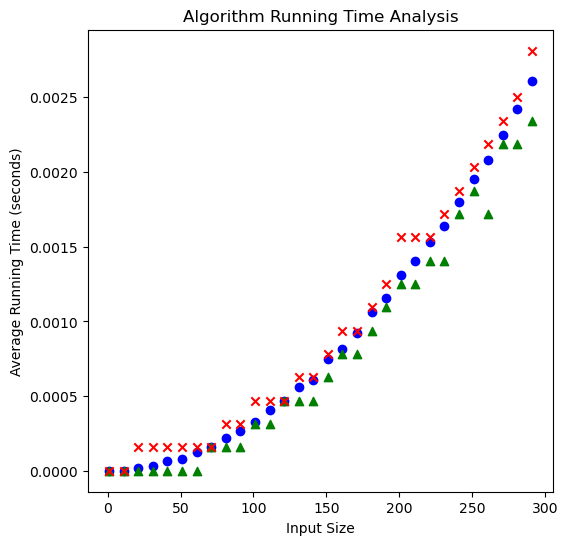

Progress: [#################################################>] 100%


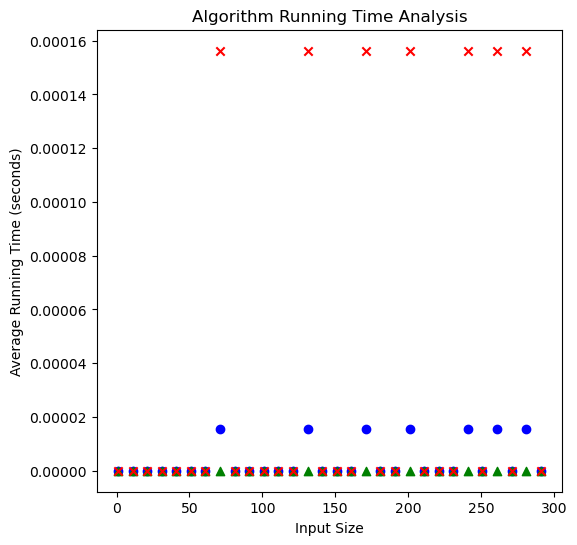

In [40]:
def my_bubble_sort(input_list):
    comp_num = 0
    n = len(input_list)
    for i in range(n):
        for j in range(n-i-1):
            comp_num += 1
            if input_list[j] > input_list[j+1]:
                input_list[j], input_list[j+1] = input_list[j+1], input_list[j]
    return (input_list, comp_num)

test_sort_algo(my_bubble_sort, n_sizes=300)
test_sort_algo(sorted, n_sizes=300)

#### b. List Comprehension vs. For-Loop Performance


Use the `%%timeit` cell magic to compare two ways of generating a list of the first 1,000 square numbers ($0^2, 1^2, 2^2, \dots, 999^2$):

1. **List comprehension:** `[x**2 for x in range(1000)]`
2. **Traditional for-loop** with `.append()`:
   ```python
   squares = []
   for x in range(1000):
       squares.append(x**2)
   ```

Which approach is faster, and by how much? Why might list comprehensions have a performance advantage? *(Hint: think about the overhead of calling `.append()` on every iteration vs. the optimized internal loop of a comprehension.)*

In [ ]:
%timeit [x**2 for x in range(1000)]

In [ ]:
def traditional_loop():
    squares = []
    for x in range(1000):
        squares.append(x**2)
    return squares

%timeit traditional_loop()

### 3. Best, Average, Worst Cases

#### a. Linear Search — Best, Average, and Worst Cases


Implement a **linear search** function `linear_search(lst, target)` that scans through a list from left to right and returns the index of `target` if found, or `-1` if the target is not in the list.

After implementing it, describe the three complexity cases in a comment or markdown cell:

- **Best case** $O(1)$: What input causes the search to terminate immediately?
- **Average case** $O(n/2) \approx O(n)$: What happens when the target is at a random position?
- **Worst case** $O(n)$: What input forces the algorithm to examine every element?

Give a concrete example of each case for a list like `[0, 1, 2, ..., 99999]`.

In [26]:
def linear_search(lst: list[int], target: int) -> int:
    for i, num in enumerate(lst):
        if num == target:
            return i
    return -1

lst = [x for x in range(1000)]

%timeit linear_search(lst, 1)
%timeit linear_search(lst, 500)
%timeit linear_search(lst, 999)

179 ns ± 0.709 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
14 μs ± 76.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
29.1 μs ± 478 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### b. Binary Search — Best, Average, and Worst Cases


Implement a **binary search** function `binary_search(lst, target)` that searches a **sorted** list by repeatedly halving the search interval. Return the index of `target` if found, or `-1` otherwise.

**Algorithm outline:**
1. Maintain two pointers, `low` and `high`, initially spanning the whole list.
2. Compute `mid = (low + high) // 2`.
3. If `lst[mid] == target`, return `mid`.
4. If `lst[mid] > target`, search the left half (`high = mid - 1`).
5. Otherwise, search the right half (`low = mid + 1`).
6. If `low > high`, the target is not in the list.

Describe the three complexity cases:
- **Best case** $O(1)$: The target is at the midpoint on the first check.
- **Average case** $O(\log n)$: The target requires several halvings.
- **Worst case** $O(\log n)$: The target is at an extreme position or absent.

**Key insight:** Even the worst case of binary search is $O(\log n)$, which is dramatically better than linear search's $O(n)$ for large lists.

In [23]:
def binary_search(lst: list[int], target: int) -> int:
    low, high = 0, len(lst)
    while low <= high:
        mid = (low+high)//2
        if mid >= len(lst): break
        if lst[mid] == target:
            return mid
        elif lst[mid] > target:
            high = mid-1
        elif lst[mid] < target:
            low = mid+1
    return -1

%timeit binary_search([x for x in range(1000)], 346)
%timeit binary_search([x for x in range(1000)], 500)
%timeit binary_search([x for x in range(1000)], 999)

17 μs ± 76.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
15.6 μs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
16.8 μs ± 97.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### c. Empirical Comparison: Linear vs. Binary Search


Use `%timeit` to empirically compare the performance of your linear search and binary search implementations on a **sorted list of 100,000 elements** (`[0, 1, 2, ..., 99999]`).

Test three scenarios:
1. **Worst case for linear search:** Target is the last element (e.g., `99999`).
2. **Best case for linear search:** Target is near the beginning (e.g., `1`).
3. **Average case (random target):** Pick a random element from the list using `random.choice()`.

For each scenario, run `%timeit` on both `linear_search` and `binary_search` with the same target.

**Question:** In the random-target (average) case, how many times faster is binary search compared to linear search? Does this ratio match what you would expect from the theoretical complexities $O(n)$ vs. $O(\log n)$?

In [27]:
import random

lst = [x for x in range(100000)]
target = 99999

%timeit linear_search(lst, target)
%timeit binary_search(lst, target)


3.08 ms ± 49.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.68 μs ± 38.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [28]:
lst = [x for x in range(100000)]
target = 1

%timeit linear_search(lst, target)
%timeit binary_search(lst, target)


184 ns ± 1.43 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
2.45 μs ± 31.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [29]:
lst = [x for x in range(100000)]
target = random.choice(lst)

%timeit linear_search(lst, target)
%timeit binary_search(lst, target)


2.29 ms ± 31.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.07 μs ± 13.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
